# ***Задание 2.***

---





# **Визуальный анализ данных**
 **Цель работы**:Изучить программные средства, используемые для визуализации наборов данных.

Выполним анализ набора данных cancer.csv. Набор разработан для прогнозирования на основе различных признаков возникновения рецидива рака груди после прохождения некоторых видов лечения.

Атрибуты:
*  age – возраст пациента
*  menopause – менопаузальный статус пациенток
*  tumor-size – информация о размере опухоли
*  inv-nodes – информация о количестве подмышечных лимфатических узлов,
пораженных или пораженных раком молочной железы
* node-caps – информация о наличии или отсутствии инкапсуляции или вовлеченности опухоли в лимфатические узлы
*  deg-malig – степень злокачественности или тяжесть опухоли
*  breast – расположение опухоли в груди
*  breast-quad – информация о конкретном квадранте или области груди, пораженной раком
* irradiat – получал ли пациент лучевую терапию в рамках лечения рака груди.
* Class – указывает, был ли у пациентки рецидив рака (recurrence-events) или не было рецидива (целевая переменная).

# *1. Импортируйте необходимые библиотеки*

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# *2. Импортируйте набор данных из файла cancer.csv и поместите его в датафрейм*

In [21]:
data=pd.read_csv('cancer.csv')
data.head(10)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1
5,1,8,10,10,8,7,10,9,7,1
6,0,1,1,1,1,2,10,3,1,1
7,0,2,1,2,1,2,1,3,1,1
8,0,2,1,1,1,2,1,1,1,5
9,0,4,2,1,1,2,1,2,1,1


# *3. Получим сводную информацию по датафрейму*

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        683 non-null    int64
 1   age          683 non-null    int64
 2   menopause    683 non-null    int64
 3   tumor-size   683 non-null    int64
 4   inv-nodes    683 non-null    int64
 5   node-caps    683 non-null    int64
 6   deg-malig    683 non-null    int64
 7   breast       683 non-null    int64
 8   breast-quad  683 non-null    int64
 9   irradiat     683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


# *4. Визуализация количественных признаков*

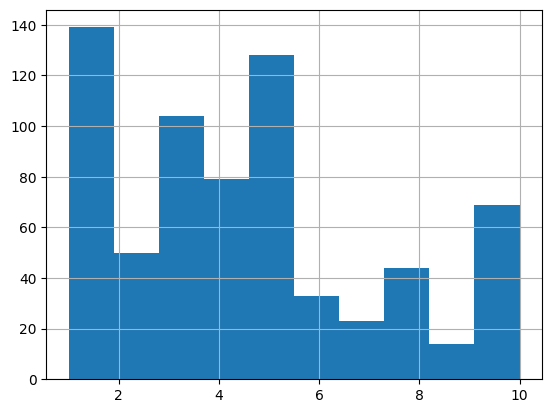

In [23]:
data['age'].hist();

# *5. Распределеие нескольких признаков*

array([[<Axes: title={'center': 'Class'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'menopause'}>],
       [<Axes: title={'center': 'tumor-size'}>,
        <Axes: title={'center': 'inv-nodes'}>,
        <Axes: title={'center': 'node-caps'}>],
       [<Axes: title={'center': 'deg-malig'}>,
        <Axes: title={'center': 'breast'}>,
        <Axes: title={'center': 'breast-quad'}>],
       [<Axes: title={'center': 'irradiat'}>, <Axes: >, <Axes: >]],
      dtype=object)

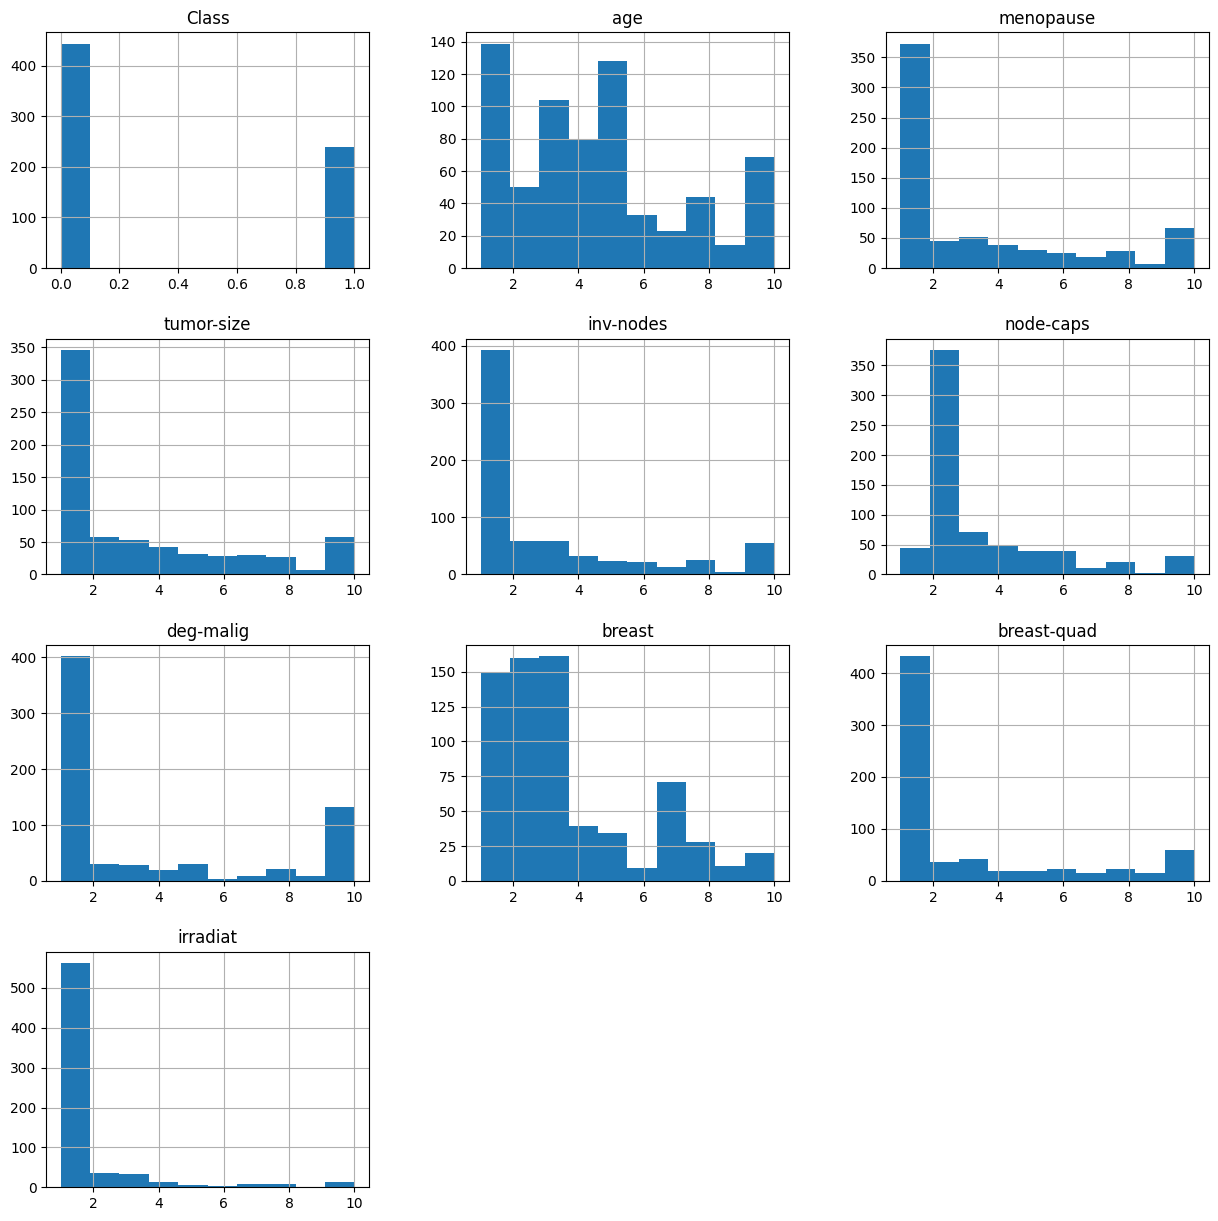

In [24]:
data.hist(figsize=(15,15))

# *6. График с помощью matplotlib*

<BarContainer object of 683 artists>

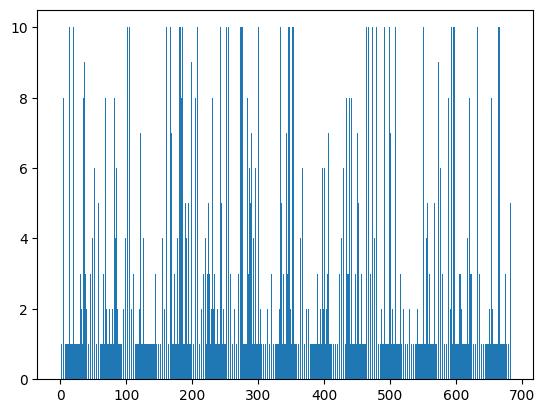

In [25]:
plt.bar(data.index, data['inv-nodes'])

# *7. График распределения*

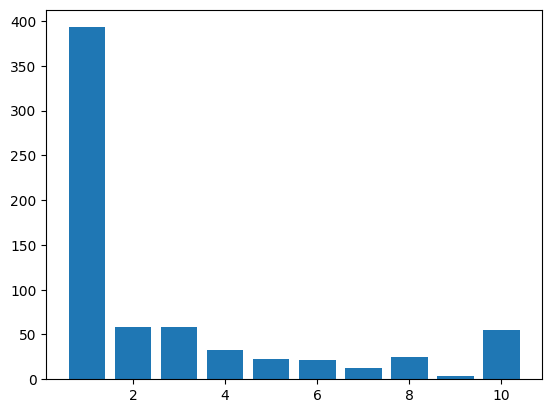

In [26]:
hist=data['inv-nodes'].value_counts()
plt.bar(hist.index, hist);

# *8.Диаграмма типа "Ящик с усами"*

<Axes: ylabel='inv-nodes'>

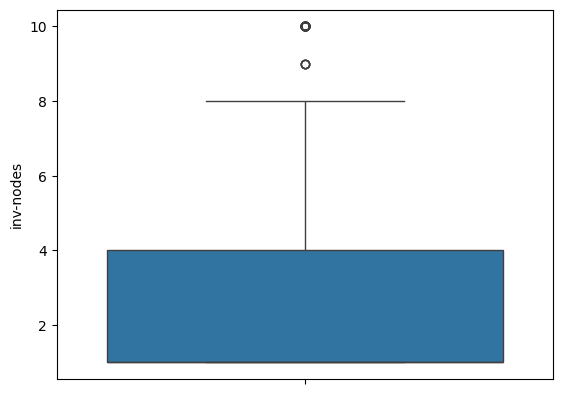

In [27]:
sns.boxplot(data['inv-nodes'])

# *9. Визуализация категориальных признаков*

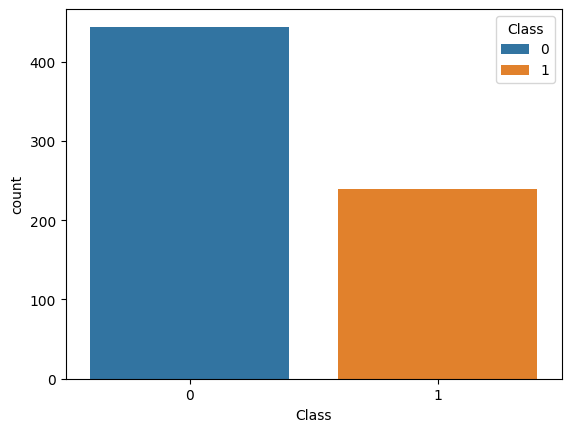

In [28]:
sns.countplot(data, x='Class', hue='Class')
plt.show()

# *10. Гистограмма*

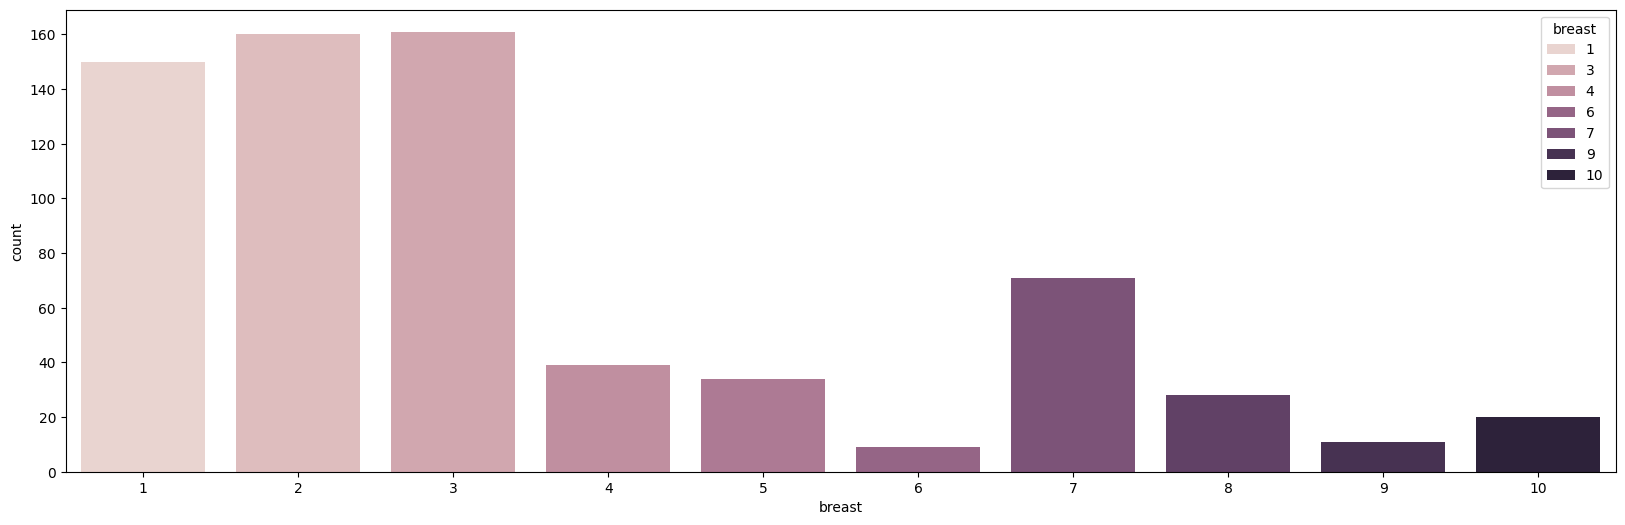

In [29]:
fig=plt.subplots(figsize=(20,6))
sns.countplot(data, x='breast', hue='breast')
plt.show()

# *11. Столбчатая диаграмма*

<BarContainer object of 10 artists>

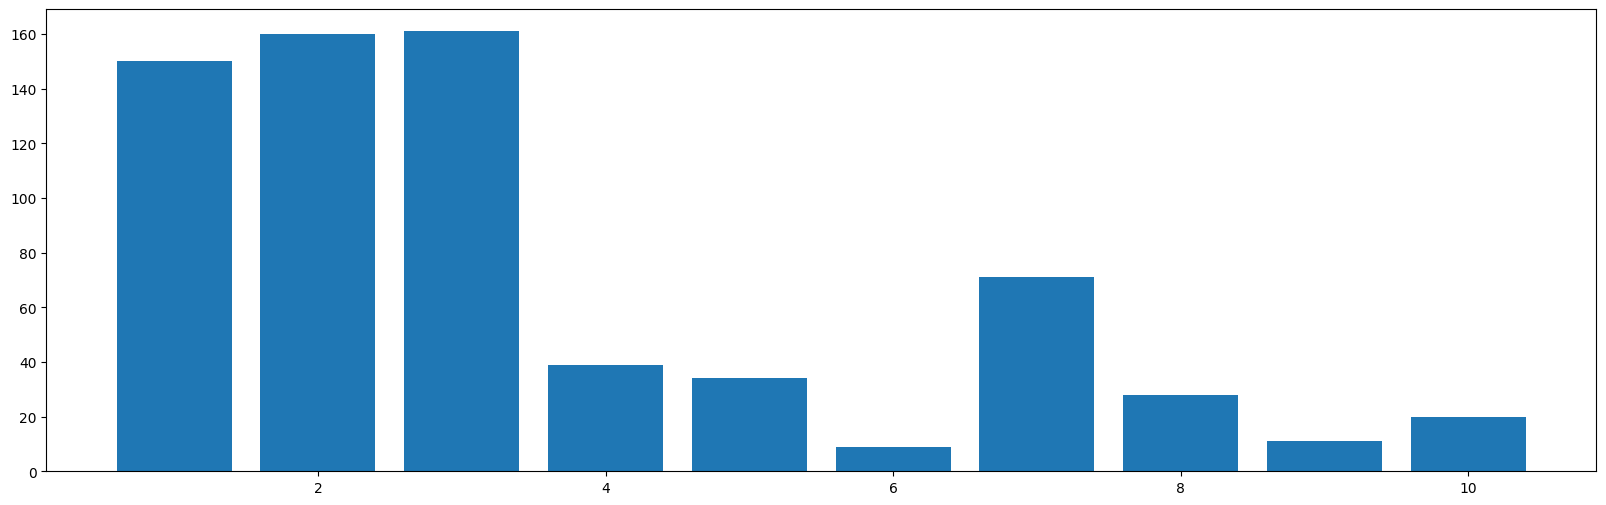

In [30]:
fig=plt.subplots(figsize=(20,6))
hist=data['breast'].value_counts()
plt.bar(hist.index, hist)

# `12. Визуализация связанных признаков`

array([[<Axes: title={'center': 'breast'}>,
        <Axes: title={'center': 'breast-quad'}>]], dtype=object)

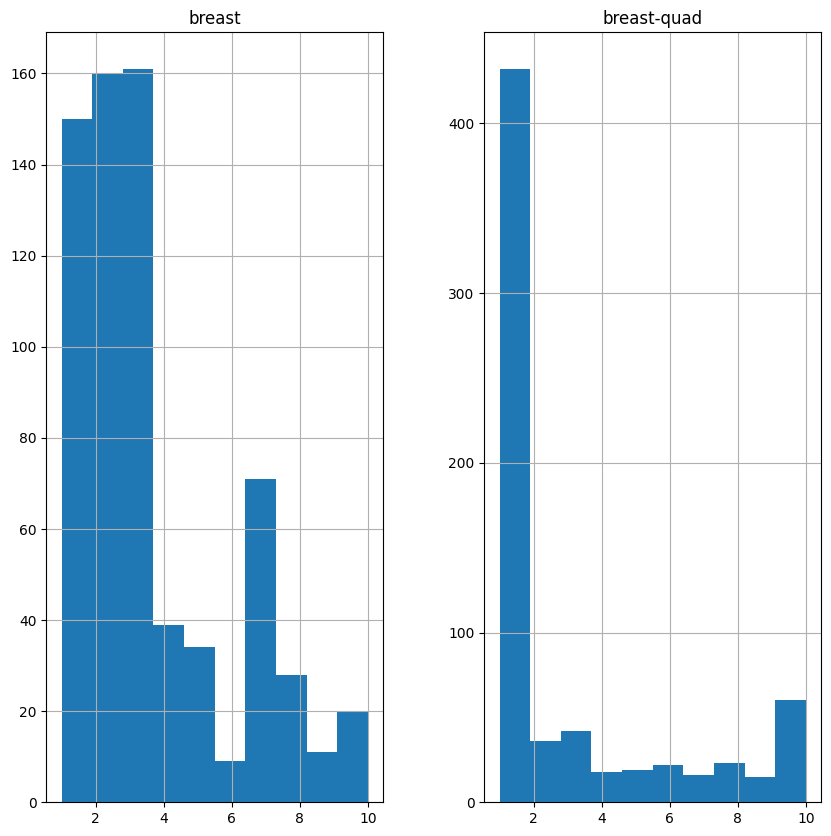

In [31]:
#Отбор признаков связанных с расположением опухоли
feats = [f for f in data.columns if 'breast'in f]
data[feats].hist(figsize=(10,10))

# *13.Попарное сравнение*

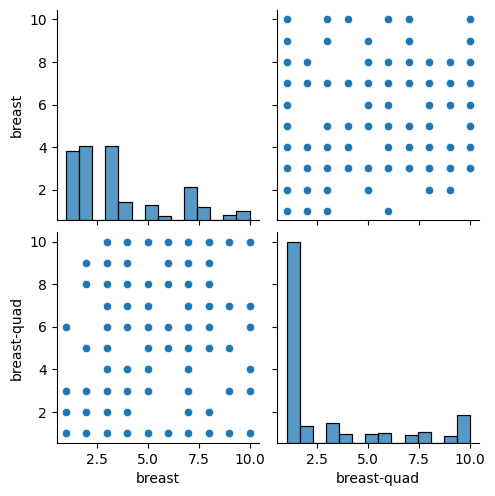

In [32]:
feats = [f for f in data.columns if 'breast'in f]
sns.pairplot(data[feats])

# *14. Попарное сравнение с учетом целевой переменной*

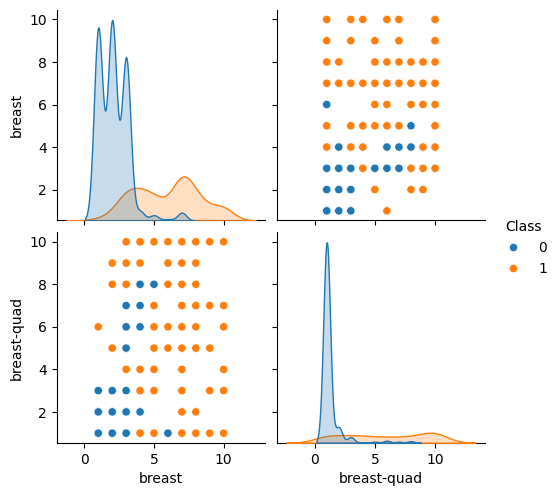

In [33]:
feats = [f for f in data.columns if 'breast'in f]
sns.pairplot(data[feats+['Class']], hue='Class')

# *15. Распределение по двум признакам*

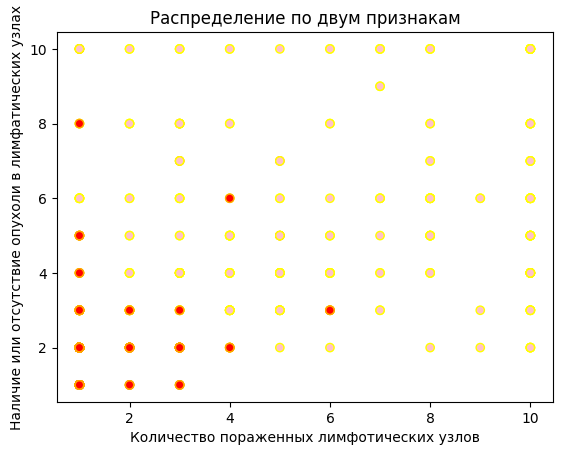

In [42]:
c = data['Class'].map({0: 'red', 1: 'pink'})
edge_c = data['Class'].map({0: 'orange', 1: 'yellow'})

plt.scatter(data['inv-nodes'], data['node-caps'],
            c=c, edgecolors=edge_c
            )
plt.xlabel('Количество пораженных лимфотических узлов')
plt.ylabel('Наличие или отсутствие опухоли в лимфатических узлах')
plt.title('Распределение по двум признакам')
plt.show()

# *16. Матрица корреляции*

<Axes: >

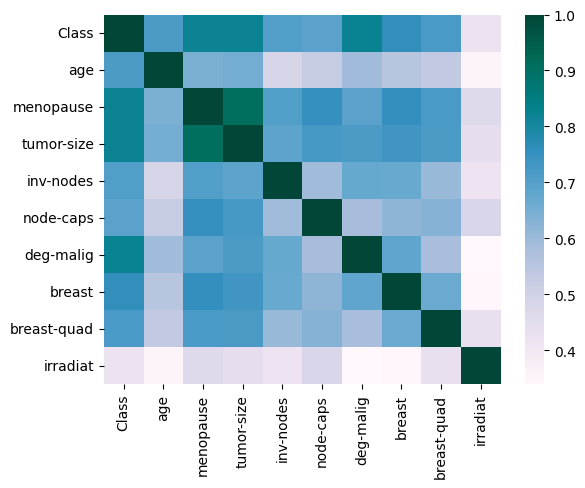

In [43]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.PuBuGn)